# Loading the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Pooja Sambhwani\\Data Analytics and Statistics (Regex)\\Datasets\\zalando_womens_clothing.csv")
df.head()

,name,brand,sizes,skus,originalPrice,promotionalPrice,discountPercentage
0,Blouse - off white,Anna Field,"6, 8, 10, 12, 16, 18, 20, 22, 24, 26","AN621E0AO-A110034000, AN621E0AO-A110036000, AN...",£25.99,£22.00,15% off
1,LADIES OPEN EDGE TERRY TURN UP PANTS - Tracksu...,Urban Classics,"XS, S, M, L, XL, 3XL, 4XL, 5XL","UR621A01M-Q1100XS000, UR621A01M-Q11000S000, UR...",£25.00,NaN,NaN
2,ONLNOELLE MIDI STRING SKIRT - A-line skirt - b...,ONLY,"XS, S, M, L, XL, XXL, 3XL","ON321B1AF-Q1100XS000, ON321B1AF-Q11000S000, ON...",£35.99,NaN,NaN
3,STRETCH - Shorts - khaki stone,The North Face,"12, 14, 18","TH321S01H-B110008000, TH321S01H-B110010000, TH...",£59.99,£54.00,10% off
4,Hoodie - black,Even&Odd,"XS, S, M, L","EV421J08C-Q1100XS000, EV421J08C-Q11000S000, EV...",£20.99,£10.00,52% off


# Data Cleaning - Handling missing values and outliers

In [3]:
df = df.dropna(subset=['originalPrice', 'promotionalPrice', 'discountPercentage'])

In [4]:
# Clean discountPercentage and convert to float
def clean_discount_percentage(value):
    if isinstance(value, str):
        value = value.replace('% off', '').replace('%', '').replace('up to', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    return value

df['discountPercentage'] = df['discountPercentage'].apply(clean_discount_percentage)
df.dropna(subset=['discountPercentage'], inplace=True)

In [5]:
# Remove currency symbols and commas, then convert to float
df['originalPrice'] = df['originalPrice'].str.replace('£', '').str.replace(',', '').astype(float)
df['promotionalPrice'] = df['promotionalPrice'].str.replace('£', '').str.replace(',', '').astype(float)

# Exploratory Data Analysis (EDA)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 10946
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4272 non-null   object 
 1   brand               4272 non-null   object 
 2   sizes               4272 non-null   object 
 3   skus                4272 non-null   object 
 4   originalPrice       4272 non-null   float64
 5   promotionalPrice    4272 non-null   float64
 6   discountPercentage  4272 non-null   float64
dtypes: float64(3), object(4)
memory usage: 427.0+ KB


In [26]:
df.describe

<bound method NDFrame.describe of                                               name               brand  \
0                               Blouse - off white          Anna Field   
3                  STRETCH  - Shorts - khaki stone      The North Face   
4                                   Hoodie - black            Even&Odd   
9                        Tracksuit bottoms - black    adidas Originals   
12                                 Trousers - teal    Anna Field Curvy   
...                                            ...                 ...   
10929               TANK SHEER - Top - lilac bloom    Nike Performance   
10932                      UNISEX - Shorts - black       Les Benjamins   
10942                   ADJO - Shift dress - black                 Iro   
10944  SQUADRA SHORT - Sports shorts - white/black  adidas Performance   
10946                      DREW - Top - dried moss              Gestuz   

                                      sizes  \
0      6, 8, 10, 12, 16, 18, 2

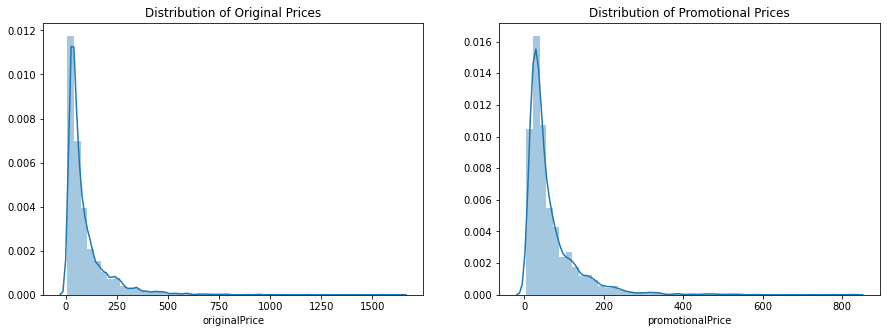

In [7]:
plt.figure(figsize = (15,5)) 
plt.subplot(121) 
sns.distplot(df['originalPrice'])
plt.title('Distribution of Original Prices')

plt.subplot(122) 
sns.distplot(df['promotionalPrice'])
plt.title('Distribution of Promotional Prices')

plt.show()

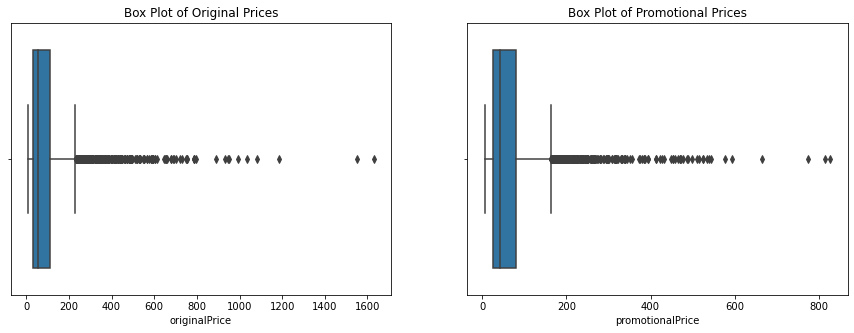

In [8]:
# Box plots to identify outliers
plt.figure(figsize = (15,5)) 
plt.subplot(121) 
sns.boxplot(x=df['originalPrice'])
plt.title('Box Plot of Original Prices')

plt.subplot(122) 
sns.boxplot(x=df['promotionalPrice'])
plt.title('Box Plot of Promotional Prices')

plt.show()

In [9]:
# Finding the IRQ 

OGpercentile25 = df['originalPrice'].quantile(0.25)
OGpercentile75 = df['originalPrice'].quantile(0.75) 

percentile25 = df['promotionalPrice'].quantile(0.25)
percentile75 = df['promotionalPrice'].quantile(0.75) 

In [10]:
print(OGpercentile25)
print(OGpercentile75)
print(percentile25)
print(percentile75)

31.99
111.8
25.0
80.0


In [11]:
IQR1 = OGpercentile75 - OGpercentile25
IQR2 = percentile75 - percentile25 
print(IQR1)
print(IQR2)

79.81
55.0


In [12]:
upper_limit1 = OGpercentile75 + 1.5*IQR1
upper_limit2 = percentile75 + 1.5*IQR2
print(upper_limit1)
print(upper_limit2)

231.515
162.5


In [13]:
lower_limit1 = OGpercentile25 - 1.5*IQR1
lower_limit2 = percentile25 - 1.5*IQR2 
print(lower_limit1)
print(lower_limit2)

-87.72500000000001
-57.5


In [14]:
df[df['originalPrice']> upper_limit1]
df[df['promotionalPrice']> upper_limit2]

,name,brand,sizes,skus,originalPrice,promotionalPrice,discountPercentage
179,OLYMPIA PANTS - Cargo trousers - off white,Alice + Olivia,"4, 6, 8, 10, 12, 14, 16, 18","A2N21A01F-A11000N000, A2N21A01F-A110002000, A2...",495.00,248.0,50.0
234,LINED COAT - Trenchcoat - black,Lauren Ralph Lauren,"S, M, L","L4221U0AS-Q11000S000, L4221U0AS-Q11000M000, L4...",319.99,224.0,30.0
251,Trenchcoat - black,Massimo Dutti,"M, L","M3I21U0S2-Q11000M000, M3I21U0S2-Q11000L000",249.00,169.0,32.0
257,LINED COAT - Trenchcoat - dark navy,Lauren Ralph Lauren,"S, L, XL","L4221U0AS-K11000S000, L4221U0AS-K11000L000, L4...",319.99,224.0,30.0
455,MAKARAS - Trenchcoat - open beige,HUGO,"10, 12, 14, 16","HU721U07L-B110038000, HU721U07L-B110040000, HU...",379.99,247.0,35.0
...,...,...,...,...,...,...,...
10839,BLOUSON - Faux leather jacket - black,Armani Exchange,"XS, S, M, L, XL","ARC21U02T-Q1100XS000, ARC21U02T-Q11000S000, AR...",269.99,216.0,20.0
10861,SQUARE SLEEVE ICON DRESS - Shift dress - beige,Hervé Léger,"6, 8","HL421C091-A1100XS000, HL421C091-A11000S000",785.00,471.0,40.0
10889,REIDLY SHORT SLEEVE DAY DRESS - Jersey dress -...,Lauren Ralph Lauren,"4, 6, 8, 10, 12","L4221C1R3-Q110000000, L4221C1R3-Q110002000, L4...",219.99,176.0,20.0
10903,WASTE SKIRT IN RUG TECHNIQUE - Denim skirt - b...,Ksenia Schnaider,"XS, M, L, XL","KS021B008-K1100XS000, KS021B008-K11000M000, KS...",390.00,195.0,50.0


In [15]:
df[df['originalPrice']< lower_limit1]
df[df['promotionalPrice']< lower_limit2]

,name,brand,sizes,skus,originalPrice,promotionalPrice,discountPercentage


In [16]:
# Capping(Outlier Removing technique) 

new_df_cap1 = df.copy() 
new_df_cap2 = df.copy() 

In [17]:
new_df_cap1['originalPrice'] = np.where(
    
    new_df_cap1['originalPrice'] > upper_limit1 , 
    upper_limit1 , 
    
    np.where(
    new_df_cap1['originalPrice'] < lower_limit1 , 
    lower_limit1 , 
    new_df_cap1['originalPrice'])
)
new_df_cap1

,name,brand,sizes,skus,originalPrice,promotionalPrice,discountPercentage
0,Blouse - off white,Anna Field,"6, 8, 10, 12, 16, 18, 20, 22, 24, 26","AN621E0AO-A110034000, AN621E0AO-A110036000, AN...",25.990,22.0,15.0
3,STRETCH - Shorts - khaki stone,The North Face,"12, 14, 18","TH321S01H-B110008000, TH321S01H-B110010000, TH...",59.990,54.0,10.0
4,Hoodie - black,Even&Odd,"XS, S, M, L","EV421J08C-Q1100XS000, EV421J08C-Q11000S000, EV...",20.990,10.0,52.0
9,Tracksuit bottoms - black,adidas Originals,"0/2 (XXS), 4/6 (XS), 8/10 (S)","AD121A1GG-Q1102XS000, AD121A1GG-Q1100XS000, AD...",89.990,81.0,10.0
12,Trousers - teal,Anna Field Curvy,"18, 20, 26","AX821A017-P110046000, AX821A017-P110048000, AX...",25.990,23.0,12.0
...,...,...,...,...,...,...,...
10929,TANK SHEER - Top - lilac bloom,Nike Performance,"XXS, XS, S, M, L, XL, XXL","N1241D294-I1102XS000, N1241D294-I1100XS000, N1...",37.990,34.0,11.0
10932,UNISEX - Shorts - black,Les Benjamins,"XS, S, L, XL","LBF21003F-Q1100XS000, LBF21003F-Q11000S000, LB...",231.515,252.0,40.0
10942,ADJO - Shift dress - black,Iro,"S, L, XL","IR221C072-Q11000S000, IR221C072-Q11000L000, IR...",231.515,156.0,35.0
10944,SQUADRA SHORT - Sports shorts - white/black,adidas Performance,"XXS, XS, XL, XXL","AD541E1LA-A120XXS000, AD541E1LA-A1200XS000, AD...",19.990,18.0,10.0


In [18]:
new_df_cap2['promotionalPrice'] = np.where(
    
    new_df_cap2['promotionalPrice'] > upper_limit2 , 
    upper_limit2 , 
    
    np.where(
    new_df_cap2['promotionalPrice'] < lower_limit2 , 
    lower_limit2 , 
    new_df_cap2['promotionalPrice'])
)
new_df_cap2

,name,brand,sizes,skus,originalPrice,promotionalPrice,discountPercentage
0,Blouse - off white,Anna Field,"6, 8, 10, 12, 16, 18, 20, 22, 24, 26","AN621E0AO-A110034000, AN621E0AO-A110036000, AN...",25.99,22.0,15.0
3,STRETCH - Shorts - khaki stone,The North Face,"12, 14, 18","TH321S01H-B110008000, TH321S01H-B110010000, TH...",59.99,54.0,10.0
4,Hoodie - black,Even&Odd,"XS, S, M, L","EV421J08C-Q1100XS000, EV421J08C-Q11000S000, EV...",20.99,10.0,52.0
9,Tracksuit bottoms - black,adidas Originals,"0/2 (XXS), 4/6 (XS), 8/10 (S)","AD121A1GG-Q1102XS000, AD121A1GG-Q1100XS000, AD...",89.99,81.0,10.0
12,Trousers - teal,Anna Field Curvy,"18, 20, 26","AX821A017-P110046000, AX821A017-P110048000, AX...",25.99,23.0,12.0
...,...,...,...,...,...,...,...
10929,TANK SHEER - Top - lilac bloom,Nike Performance,"XXS, XS, S, M, L, XL, XXL","N1241D294-I1102XS000, N1241D294-I1100XS000, N1...",37.99,34.0,11.0
10932,UNISEX - Shorts - black,Les Benjamins,"XS, S, L, XL","LBF21003F-Q1100XS000, LBF21003F-Q11000S000, LB...",420.00,162.5,40.0
10942,ADJO - Shift dress - black,Iro,"S, L, XL","IR221C072-Q11000S000, IR221C072-Q11000L000, IR...",240.00,156.0,35.0
10944,SQUADRA SHORT - Sports shorts - white/black,adidas Performance,"XXS, XS, XL, XXL","AD541E1LA-A120XXS000, AD541E1LA-A1200XS000, AD...",19.99,18.0,10.0


In [19]:
new_df_cap1.shape

(4272, 7)

In [20]:
new_df_cap2.shape

(4272, 7)

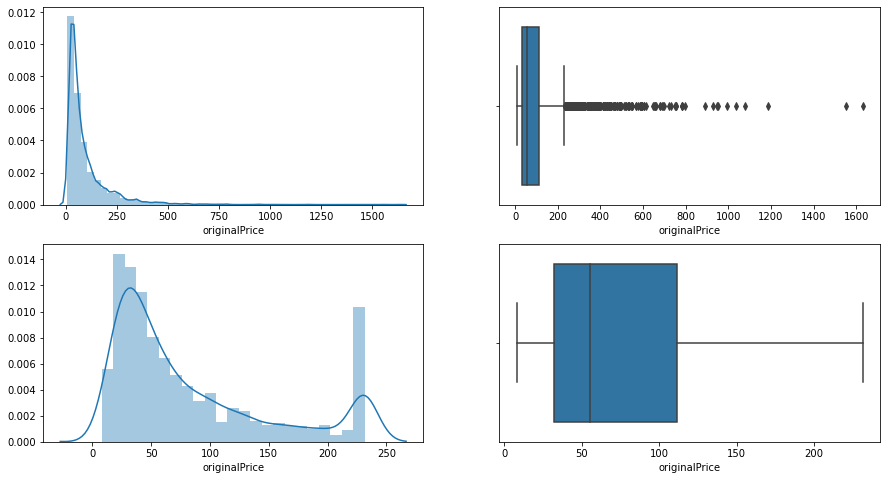

In [21]:
# Comparision 

plt.figure(figsize = (15,8)) 
plt.subplot(221)  
sns.distplot(df['originalPrice']) 

plt.subplot(222) 
sns.boxplot(df['originalPrice']) 

plt.subplot(223) 
sns.distplot(new_df_cap1['originalPrice']) 

plt.subplot(224)
sns.boxplot(new_df_cap1['originalPrice']) 
plt.show() 

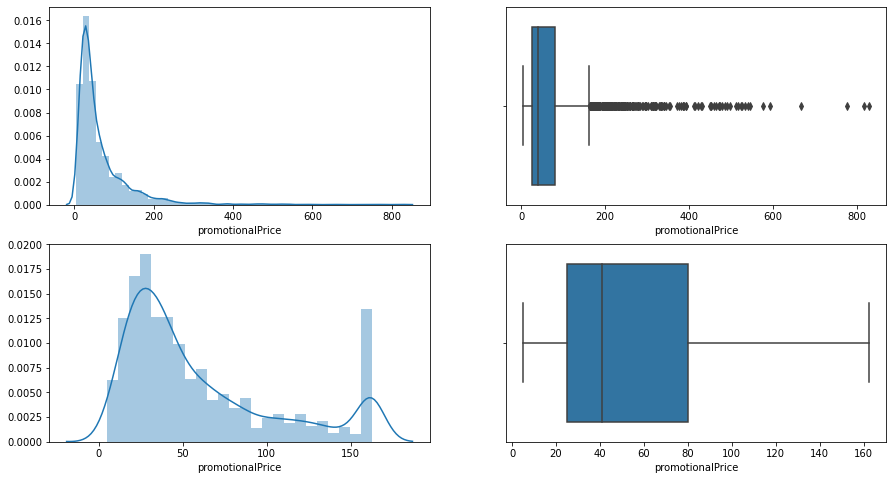

In [22]:
# Comparision 

plt.figure(figsize = (15,8)) 
plt.subplot(221)  
sns.distplot(df['promotionalPrice']) 

plt.subplot(222) 
sns.boxplot(df['promotionalPrice']) 

plt.subplot(223) 
sns.distplot(new_df_cap2['promotionalPrice']) 

plt.subplot(224)
sns.boxplot(new_df_cap2['promotionalPrice']) 
plt.show() 

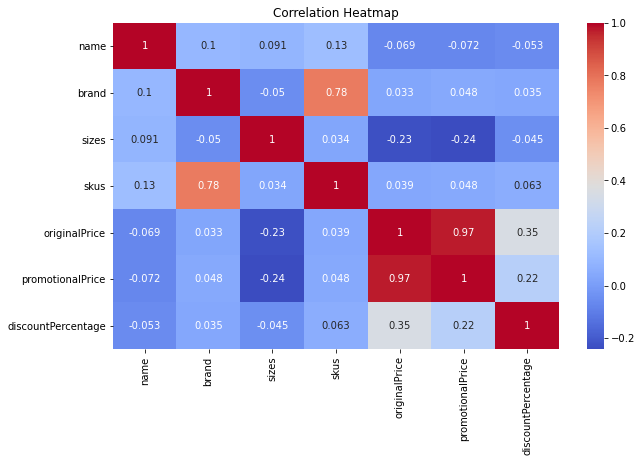

In [44]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

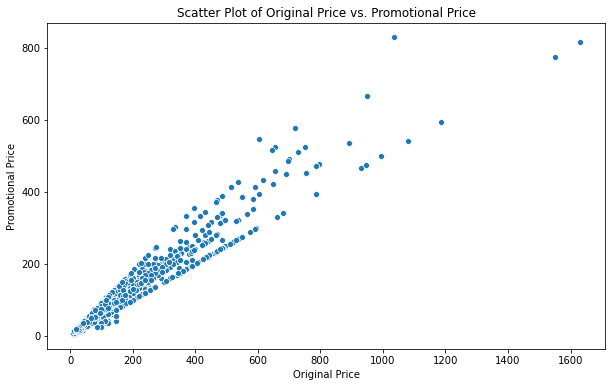

In [23]:
# Scatter plot between originalPrice and promotionalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='originalPrice', y='promotionalPrice', data=df)
plt.title('Scatter Plot of Original Price vs. Promotional Price')
plt.xlabel('Original Price')
plt.ylabel('Promotional Price')
plt.show()

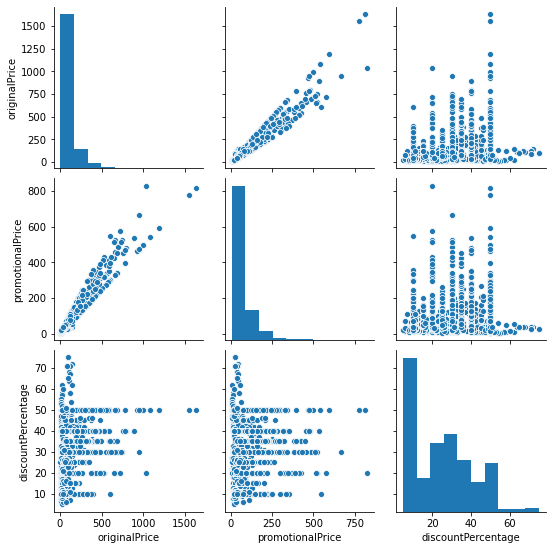

In [24]:
# Pairplot for the entire dataset
sns.pairplot(df)
plt.show()

# Feature Engineering

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
lb = LabelEncoder()

In [29]:
df['name'] = lb.fit_transform(df['name'])
df['brand'] = lb.fit_transform(df['brand'])
df['sizes'] = lb.fit_transform(df['sizes'])
df['skus'] = lb.fit_transform(df['skus'])

In [30]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
df[['originalPrice']] = scaler.fit_transform(df[['originalPrice']])
df[['promotionalPrice']] = scaler.fit_transform(df[['promotionalPrice']])
df[['discountPercentage']] = scaler.fit_transform(df[['discountPercentage']])

# Applying Machine Learning Model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('promotionalPrice', axis=1)
y = df['promotionalPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Define the columns that need to be preprocessed
categorical_features = ['name', 'brand', 'sizes', 'skus']
numeric_features = ['originalPrice', 'discountPercentage']

In [38]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [39]:
# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['originalPrice',
                                                   'discountPercentage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
        

# Evaluating the model

In [46]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.006110183302693657
R^2 Score: 0.993359580890657


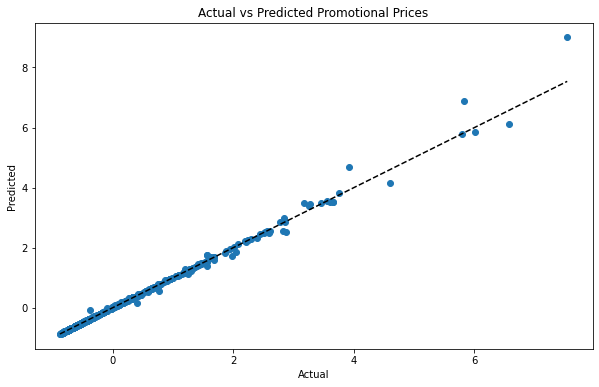

In [48]:
# Visualize predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Promotional Prices')
plt.show()

# Summary: 
The report successfully loads and preprocesses the women's clothing dataset, including handling missing values and cleaning data columns. It performs exploratory data analysis (EDA) to visualize the distribution and detect outliers in prices. The machine learning model named as Random Forest Regressor, predicts promotional prices with a certain degree of accuracy. The Mean Squared Error and R^2 Score provide metrics for evaluating model performance, a lower MSE and higher R^2 indicate better performance, and a scatter plot visualizes the actual vs. predicted values.